#Perceptron

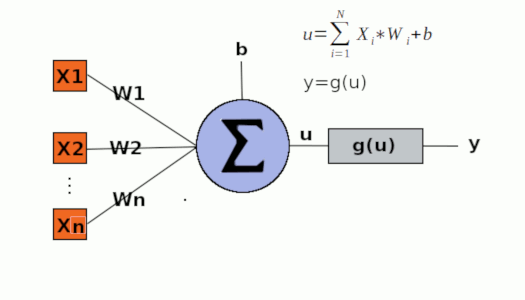

### How it work?

#### Foward propagation

* The perceptron is essential for understanding the basic functioning of a neural network. Its operation is very simple and can be represented as follows:

  * It will receive a set of inputs that will conventionally be named X, each element of X, that is, $[x_1, x_2, x_3 ... x_n] → x_i \space ϵ \space X$ will be a list of inputs that the neuron will receive.

  * For each input it will assign a set of weights randomly declared by itself, i.e. if the input set has size n then the weight sets will also have the same sizes, i.e. : $[w_1, w_2, w_3 ... w_n]→ \space w_i \space ϵ \space W$

  * After that, it will start its own Bias as 0, and perform a sum to obtain a knowledge value for that data. This sum is given by:

    $W^T·X + Bias$  

    Wherw $W^T$ is a Matrix of tranpose weights



After this multiplication of matrices and addition with the bias, the neuron calls an activation function to generate an output usually called a prediction. The most common function used as an example is the signal function, which works as follows:



 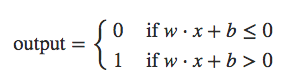


* It returns zero if the sum of $weights · inputs + bias$ is less than zero, and 1 otherwise

This stage is called Foward propagation because it will compute the values and pass them on to the output layer, generating a response to the data.

#### Updating weights and bias

* In order for the perceptron to learn the linear pattern of the data, it updates its weights and biases using an error rate of what it predicted and the correct labels of the data, i.e: y_Predict vs y_true

* This update is given by the equation: $w = \sum_{i=1}^n α ⋅ (y_{true} - y_{predicted}) ⋅x_i $

* Where $x_i$ é o dado na posiçao $i$ da iteração e $α$ is what we call learning rate of the neural network

* For to update the bias: $\sum_{i=1}^n α ⋅ (y_{true} - y_{predicted})$ ,i.e. you don't need the data in position $i$

# Implementation

In [7]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot

class Perceptron:
  def __init__(self, number_of_inputs, number_of_iterations=1000, learningRate = 0.01):
    self.weights = np.random.randn(number_of_inputs) * 0.10
    self.bias = 0
    self.n_iterations = number_of_iterations
    self.learningRate = learningRate

  def fowardPropagation(self, input):
    self.output = np.dot(input, self.weights) + self.bias

  def activationFunction(self, input):
    return np.where(input > 0, 1, 0)

  def predict(self, input):

    self.fowardPropagation(input)
    y_predicted = self.activationFunction(self.output)
    return y_predicted

  def fit(self, inputs , classes):

    for _ in range(self.n_iterations):
      for xi, y_true in zip(inputs, classes):
        y_predicted = self.predict(xi)

        update = (y_true - y_predicted) * self.learningRate

        self.weights += update * xi
        self.bias += update


# Applying on dataset make_blobs of sklearn

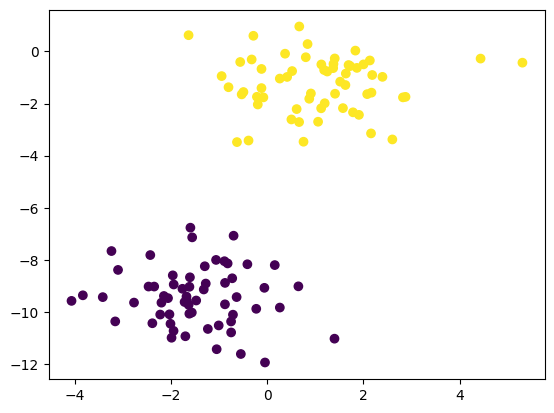

In [2]:
#Carregando o dataset
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 120 ,centers=2, cluster_std=1.05, random_state=2)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
ppn = Perceptron(X.shape[1], number_of_iterations=2000)

ppn.fit(X_train, y_train)

y_predicted = ppn.predict(X_test)


* Accuracy function

In [11]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy * 100

In [16]:
print(f'Accuracy of perceptron: {accuracy(y_test, y_predicted)}%')

Accuracy of perceptron: 1.0%


* Plotando a reta de separação dos dados do Perceptron

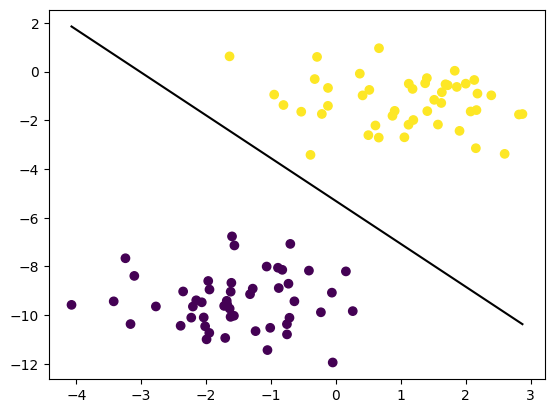

In [17]:
x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

# Calcular os pontos da linha da fronteira de decisão
x_line = np.array([x0_1,  x0_2])
y_line = (-ppn.weights[0] * x_line - ppn.bias) / ppn.weights[1]

# Certifique-se de que y_line seja unidimensional
y_line = np.squeeze(y_line)

# Plotar a linha da fronteira de decisão
ax.plot(x_line, y_line, "k")

# ... (código restante para configurar o gráfico)

# Mostrar o gráfico
plt.show()